In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_excel('tp2_wealth_data.xlsx', index_col=0)
df.cumsum().iloc[85:]

,wlth,inc
0.86,11381.3786,6850.9275
0.87,11922.1436,7011.7570
0.88,12489.6436,7175.4880
0.89,13087.1391,7343.6570
0.90,13716.8891,7515.9370
0.91,14382.2941,7693.2295
0.92,15073.8421,7875.4625
0.93,15803.4721,8063.6630
0.94,16557.6871,8259.5910
0.95,17353.5871,8463.2610


# Question 1

In [67]:
cum = np.array(df.cumsum())

In [68]:
med = df.loc[0.5]['inc']
top10 = df[df.index >= 0.9]['inc'].sum()
top5 = df[df.index >= 0.95]['inc'].sum()
sumall = df['inc'].sum()
print(med, top10/sumall, top5/sumall)

87.225 0.22117689655040762 0.12403856881601055


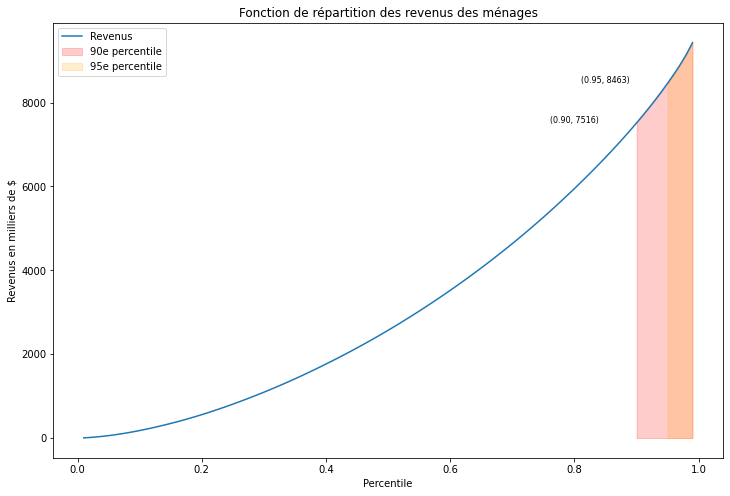

In [69]:
xax = df.index
perc10 = 0
plt.figure(figsize=(12, 8))
plt.plot(xax, cum[:,1], label="Revenus")
plt.ylabel(r'Revenus en milliers de $')
plt.xlabel(r'Percentile')
plt.fill_between(xax,cum[:,1], where=(xax>=0.9), color="red", label="90e percentile", alpha=0.2)
plt.fill_between(xax,cum[:,1], where=(xax>=0.95), color="orange", label="95e percentile", alpha=0.2)
plt.legend()
plt.annotate('(0.90, 7516)', xy=(0.8, 7516), fontsize=8, ha="center")
plt.annotate('(0.95, 8463)', xy=(0.85, 8463), fontsize=8, ha="center")

plt.title('Fonction de répartition des revenus des ménages')
plt.show()

Les revenus médians des ménages sont de 87.225 milliers de $, 10% des ménages avec les plus haut revenus s'accaparent de 22% des revenus totaux des ménages et 5% des ménages avec les plus haut revenus s'accaparent de 12% des revenus totaux des ménages

# Question 2

In [70]:
med = df.loc[0.5]['wlth']
top10 = df[df.index >= 0.9]['wlth'].sum()
top5 = df[df.index >= 0.95]['wlth'].sum()
sumall = df['wlth'].sum()
print(med, top10/sumall, top5/sumall)

106.95 0.3737171627084755 0.207634672732005


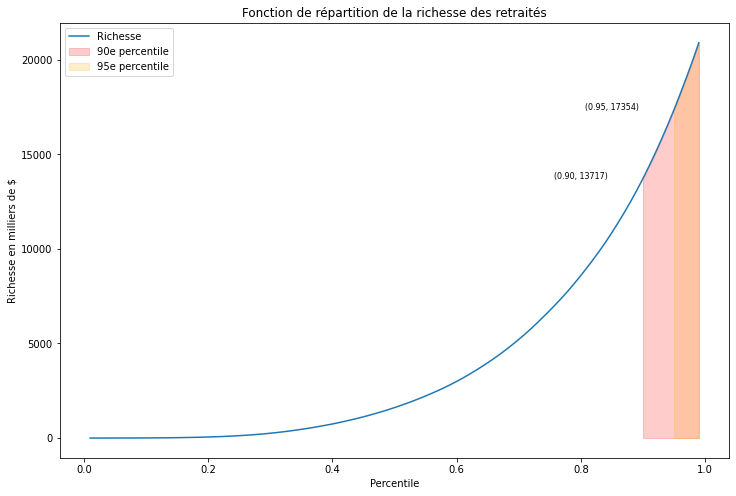

In [71]:
xax = df.index
perc10 = 0
plt.figure(figsize=(12, 8))
plt.plot(xax, cum[:,0], label="Richesse")
plt.ylabel(r'Richesse en milliers de $')
plt.xlabel(r'Percentile')
plt.fill_between(xax,cum[:,0], where=(xax>=0.9), color="red", label="90e percentile", alpha=0.2)
plt.fill_between(xax,cum[:,0], where=(xax>=0.95), color="orange", label="95e percentile", alpha=0.2)
plt.legend()
plt.annotate('(0.90, 13717)', xy=(0.8, 13717), fontsize=8, ha="center")
plt.annotate('(0.95, 17354)', xy=(0.85, 17354), fontsize=8, ha="center")

plt.title('Fonction de répartition de la richesse des retraités')
plt.show()

La richesse médiane des retraités est de 106.95 milliers de $, 10% des retraités les mieux nantis s'accaparent de 37%  de la richesse totale des retraités et 5% des retraités les mieux nantis s'accaparent de 21% de la richesse totale des retraités

On en conclut que la répartition des salaires au sein des ménages ainsi que la répartition de la richesse au seins de la population retraitée suivent tout deux une relation exponentielle. On observe que la répartition des revenus au sein des ménages tend à être moins inégales que la répartition de la richesse au sein de la population retraitée. 

# Question 3

$\max_{s} u(y,s) = ln(y-s) + \delta^{n} ln(s(1+r_n))$

$-\frac{1}{y-s} + \frac{\delta^{n}}{s} = 0$

$s = \frac{y \delta^{n}}{1 + \delta^{n}}$

$w = \frac{y \delta^{n}}{1 + \delta^{n}}(1+r_n)$

In [72]:
def u(y, s, discount=0.99, periods=35, ear=0.03):
    per_rate = (1+ear)**(periods) - 1
    return np.log(y-s) + (discount ** periods)*np.log(s(1+per_rate))

def w(y, discount=0.99, periods=35, ear=0.03):
    per_rate = (1+ear)**(periods) - 1
    return ((y*discount**(periods))/(1+ discount ** periods)) * (1+per_rate)

df['wlth_est'] = df['inc'].apply(w)

df.tail()

,wlth,inc,wlth_est
0.95,795.9000,203.6700,236.664401
0.96,837.4400,212.1110,246.472837
0.97,865.1040,224.7185,261.122743
0.98,895.3600,246.7810,286.759353
0.99,945.0405,282.3005,328.032988


# Question 4

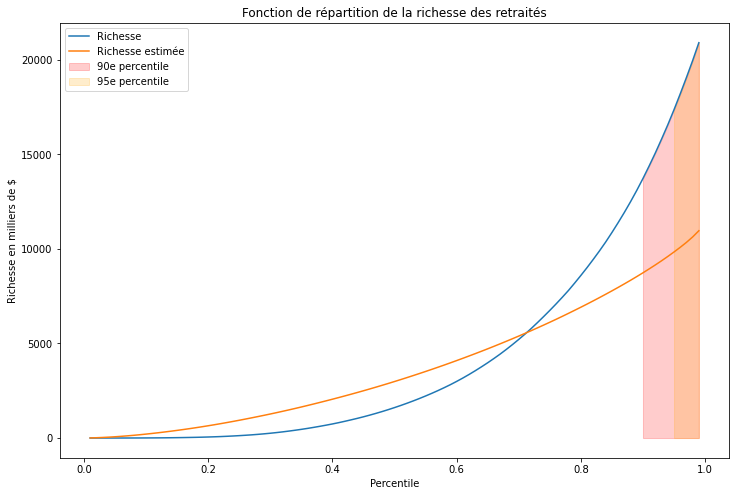

In [73]:
cum_wlth_est = np.array(df.wlth_est.cumsum())
cum_app = np.append(cum, cum_wlth_est.reshape(-1,1), axis=-1)

plt.figure(figsize=(12, 8))
plt.plot(xax, cum_app[:,0], label="Richesse")
plt.plot(xax, cum_app[:,2], label="Richesse estimée")
plt.ylabel(r'Richesse en milliers de $')
plt.xlabel(r'Percentile')
plt.fill_between(xax,cum_app[:,0], where=(xax>=0.9), color="red", label="90e percentile", alpha=0.2)
plt.fill_between(xax,cum_app[:,0], where=(xax>=0.95), color="orange", label="95e percentile", alpha=0.2)
plt.legend()

plt.title('Fonction de répartition de la richesse des retraités')
plt.show()

Le modèle tend à bien prédire la tendance exponentielle de la richesse selon le percentile, toutefois il peine à bien prédire son intensité. Concretement, le modèle sur-estime la richesse cumulée des individus sous le 70e percentile et sous-estime la richesse cumulée des individus du 70e percentile. En somme, notre modèle sous-estime les inégalités de richesse.

# Question 5

$\max_{s} u(y \phi_q,s) = ln(y(1-\tau_q)-s) + \delta^{n} ln(s(1+r_n) + y \phi_q)$

$\tau_q$ : taux de contribution (ce qu'on paye à $t_1$)

$\phi_q$ : taux de remplacement (scalaire de notre richesse reçue à $t_2$)



In [74]:
df['remp'] = 1- df.index
df['contrib'] = df['remp'] / (1+0.03)
df

,wlth,inc,wlth_est,remp,contrib
0.01,0.02000,3.8140,4.431865,0.99,0.961165
0.02,0.08000,9.6820,11.250477,0.98,0.951456
0.03,0.14460,12.0500,14.002092,0.97,0.941748
0.04,0.22500,14.5000,16.848990,0.96,0.932039
0.05,0.27775,17.3775,20.192643,0.95,0.922330
...,...,...,...,...,...
0.95,795.90000,203.6700,236.664401,0.05,0.048544
0.96,837.44000,212.1110,246.472837,0.04,0.038835
0.97,865.10400,224.7185,261.122743,0.03,0.029126
0.98,895.36000,246.7810,286.759353,0.02,0.019417


<AxesSubplot: title={'center': 'Effet de la contribution sur la richesse à la retraite'}>

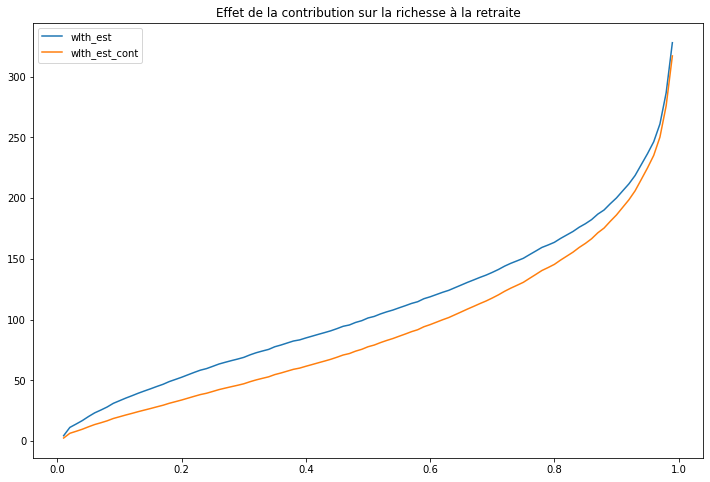

In [75]:
def w_contrib(y, discount, periods, ear, remp, contrib):
    per_rate = (1+ear)**(periods) - 1
    discount = discount ** periods
    num = -contrib*discount*y - discount*y - contrib*discount*ear*y + remp*y
    den = 1 + discount + ear + discount*ear
    return -num/den * (1 + per_rate)

inc = np.array(df['inc'])
remp = np.array(df["remp"])
contrib = np.array(df["contrib"])

df['wlth_est_cont'] = w_contrib(inc, 0.99, 35, 0.03, remp, contrib)
df[['wlth_est', 'wlth_est_cont']].plot(title="Effet de la contribution sur la richesse à la retraite", figsize=(12,8))


# Question 6

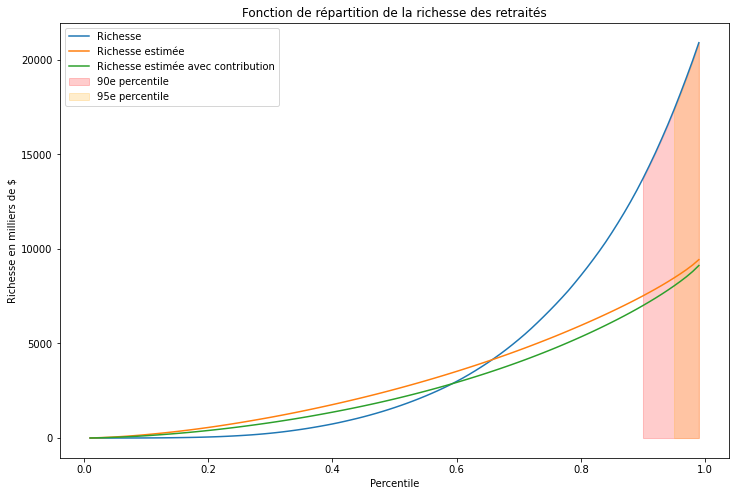

In [76]:
cum_wlth_est_cont = np.array(df.wlth_est_cont.cumsum())
cum_app = np.append(cum, cum_wlth_est_cont.reshape(-1,1), axis=-1)

plt.figure(figsize=(12, 8))
plt.plot(xax, cum_app[:,0], label="Richesse")
plt.plot(xax, cum_app[:,1], label="Richesse estimée")
plt.plot(xax, cum_app[:,2], label="Richesse estimée avec contribution")

plt.ylabel(r'Richesse en milliers de $')
plt.xlabel(r'Percentile')
plt.fill_between(xax,cum_app[:,0], where=(xax>=0.9), color="red", label="90e percentile", alpha=0.2)
plt.fill_between(xax,cum_app[:,0], where=(xax>=0.95), color="orange", label="95e percentile", alpha=0.2)
plt.legend()

plt.title('Fonction de répartition de la richesse des retraités')
plt.show()

In [77]:
df

,wlth,inc,wlth_est,remp,contrib,wlth_est_cont
0.01,0.02000,3.8140,4.431865,0.99,0.961165,2.506998
0.02,0.08000,9.6820,11.250477,0.98,0.951456,6.410168
0.03,0.14460,12.0500,14.002092,0.97,0.941748,8.035261
0.04,0.22500,14.5000,16.848990,0.96,0.932039,9.737947
0.05,0.27775,17.3775,20.192643,0.95,0.922330,11.753073
...,...,...,...,...,...,...
0.95,795.90000,203.6700,236.664401,0.05,0.048544,224.928032
0.96,837.44000,212.1110,246.472837,0.04,0.038835,235.258851
0.97,865.10400,224.7185,261.122743,0.03,0.029126,250.310970
0.98,895.36000,246.7810,286.759353,0.02,0.019417,276.059778


Nous concluons que cette nouvelle estimation de la richesse prenant en compte la contribution au régime de retraite sous estime encore la richesse accumulée par rapport aux données initiales. De plus, cette nouvelle estimation est assez similaire à celle fait précédemment sans régime de retraite. Cela est cohérent avec le fait que le rendement fait sur l'épargne soit le même que le taux d'intérêt. En effet, cela crée un effet d'éviction, ce qui veut dire que les consommateurs réduiront leur épargne privée d'un meme montant que la contribution. Ainsi, le régime de retraite actuel ne permet pas d'atténuer les inégalités de richesse.

# Question 7

<AxesSubplot: title={'center': 'Richesse observée vs richesse estimée avec taux de rendement approprié'}>

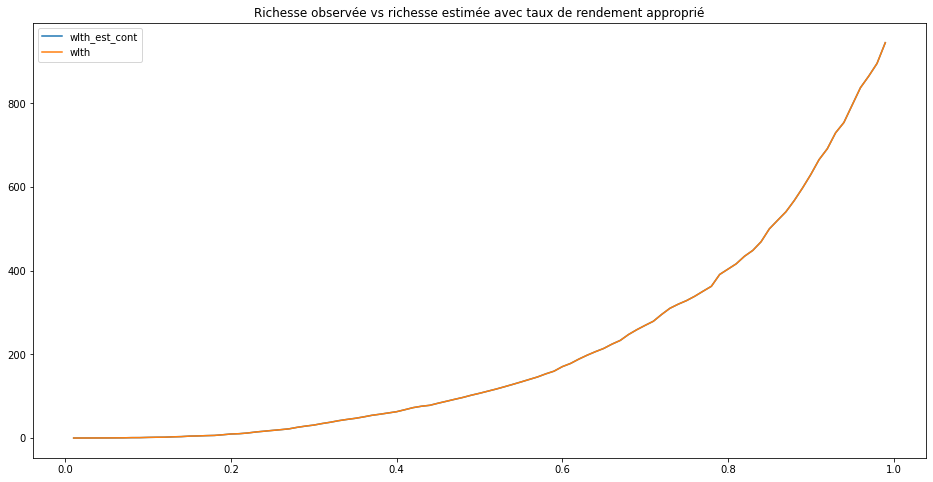

In [82]:
import scipy.optimize as opt

def diff(contrib, y, w, remp):
    return w - w_contrib(y, 0.99, 35, 0.03, remp, contrib)

contribs = []
for i in df.index:
    remp = df.loc[i]['remp']
    
    w = df.loc[i]['wlth']
    y = df.loc[i]['inc']
    contrib = opt.newton(diff, x0=0.001, args=(y, w, remp))
    contribs += [contrib]


df2 = df[['wlth', 'inc', 'remp', 'contrib']]
df2.contrib = contribs
inc = np.array(df2['inc'])
remp = np.array(df2["remp"])
contrib = np.array(df2["contrib"])

df2['wlth_est_cont'] = w_contrib(inc, 0.99, 35, 0.03, remp, contrib)

df2[['wlth_est_cont', 'wlth']].plot(figsize=(16,8), title="Richesse observée vs richesse estimée avec taux de rendement approprié")


# Question 8

In [ ]:
def gini(y):
    n = len(y)
    y_nom = [(n+1-(i+1))*val for i, val in enumerate(y)]
    return 1/n * (n + 1 - 2*sum(y_nom)/sum(y))

# Question 9

In [ ]:
inc = list(df.inc)
wlth = list(df.wlth)
print(gini(inc), gini(wlth))

0.3262056618470098 0.6020629105915184


On observe que le coefficient de Gini où la variable est le revenu est de 0.326 alors que le coefficient de Gini où la variable est la richesse est de 0.602. On peut alors affirmer que la richesse a un plus grand impact sur l'inégalité au sein de la population que le revenu. Ceci semble évident puisqu'une cummulation d'année de travail à revenu différents génère des écarts plus importants entre les différents percentiles de richesse.

# Question 10

In [49]:
df.iloc[1]

wlth              0.080000
inc               9.682000
wlth_est         11.250477
remp              0.980000
contrib           0.951456
wlth_est_cont     6.410168
Name: 0.02, dtype: float64

In [56]:
def diff(contrib, y, w, remp):
    return w - w_contrib(y, 0.99, 35, 0.03, 0.98, contrib)

print(opt.newton(diff, x0=0.000001, args=(9.682, 0.080000, 0.98)))



def diff(contrib, y, w, remp):
    return w - w_contrib(y, 0.99, 35, 0.03, 0.98, 0.38879858147334256)

diff(344, 9.682, 0.080000, 0.98)

0.38879858147334256


-2.4980018054066022e-15

In [57]:
contribs

[1.47498643028079,
 1.5205853279770576,
 1.5646913516437673,
 1.6126828967396665,
 1.68332902111782,
 1.7264661988452978,
 1.78281334067032,
 1.7648086201714004,
 1.86566076190386,
 1.8308752710344485,
 1.8601616632315996,
 1.9423417963238516,
 1.8665678141167015,
 1.8725340022863404,
 1.7544147153562295,
 1.7964310402991126,
 1.7882264714198746,
 1.842593113029305,
 1.6846950341349376,
 1.52244283175123,
 1.5457687325595524,
 1.4457473315878357,
 1.2628572005425465,
 1.1603396955747227,
 1.080691340596041,
 1.0233337664021387,
 0.9440974582886621,
 0.7565060713126104,
 0.6442491663025802,
 0.5728557093732844,
 0.46860438095383206,
 0.39608188234127795,
 0.30460099120148043,
 0.24659678847192268,
 0.21968665229198248,
 0.16188369469123876,
 0.10300237720479899,
 0.07523604317617649,
 0.03183083723010416,
 0.0015714661745036551,
 -0.06048292874744354,
 -0.11756089499971656,
 -0.145648862007132,
 -0.15654653501712468,
 -0.19987747721870797,
 -0.23280159209747653,
 -0.2726603325560085,
 -